# Vila Moema Reference Station Data - Diamante Energia

## Load data from file

In [1]:
import pandas as pd

air_quality_data = pd.read_csv("input/air-quality-reference-data-Diamante/Qar_VilaMoema_Jan22_a_Fev23.csv",
                    decimal=',', sep=';', skiprows=[1,2,3])
air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))
air_quality_data = (air_quality_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns=['index','Data e Hora']))
air_quality_data.index = air_quality_data['DateTime']
air_quality_data = air_quality_data.drop(columns='DateTime')

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_27634/3527439713.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  air_quality_data['DateTime'] = (pd.to_datetime(air_quality_data['Data e Hora'], infer_datetime_format=False, format='%d/%m/%Y %H:%M:%S'))


In [2]:
air_quality_data.head()

,Partículas Totais em Suspensão,Material Particulado <10µm,Óxidos de Nitrogênio,Dióxido de Nitrogênio,Dióxido de Enxofre,Monóxido de Nitrogênio,Ozônio,Material Particulado <2.5µm,Monóxido de Carbono
DateTime,,,,,,,,,
2022-01-01 02:30:00,40.0,31.0,4.63,4.02,4.46,0.61,13.23,9.0,0.1467
2022-01-01 03:30:00,43.0,37.0,5.31,4.38,4.33,0.93,12.07,15.0,0.1544
2022-01-01 04:30:00,32.0,22.0,9.77,8.66,4.48,1.11,13.24,9.0,0.1167
2022-01-01 05:30:00,22.0,16.0,9.91,8.57,4.44,1.34,14.42,8.0,0.1079
2022-01-01 06:30:00,27.0,16.0,9.88,8.10,4.58,1.78,13.30,5.0,0.1154


## Plot data

<Axes: xlabel='DateTime'>

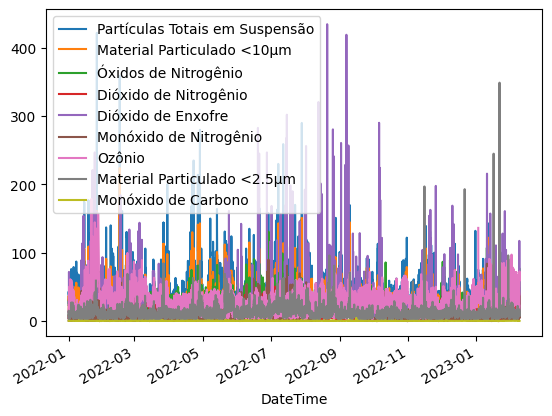

In [3]:
air_quality_data.plot()

## Save Data

In [4]:
air_quality_data.to_csv('output/ref_air_quality_data_Vila_Moema.csv')
air_quality_data.to_csv('../data-processing/input/ref_air_quality_data_Vila_Moema.csv')

## CO Data

In [9]:
co_data['measuring'] = air_quality_data['Monóxido de Carbono']
co_data.head()

DateTime
2022-01-01 02:30:00    0.1467
2022-01-01 03:30:00    0.1544
2022-01-01 04:30:00    0.1167
2022-01-01 05:30:00    0.1079
2022-01-01 06:30:00    0.1154
Name: Monóxido de Carbono, dtype: object

3749.446800784561

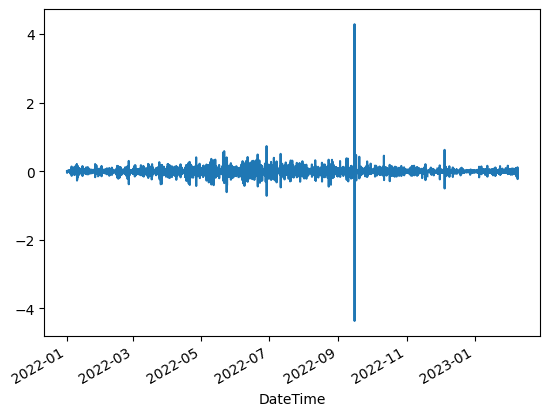

In [13]:
co_data['measuring'] = air_quality_data['Monóxido de Carbono']
co_data['Diff'] = co_data['measuring'].diff()
co_data['Diff'].plot()
max_diff = co_data['Diff'].max()
molar_mass = 28.01
max_ppb = max_diff * 1e3 / (0.0409 * molar_mass)
max_ppb

KeyError: 'measuring'

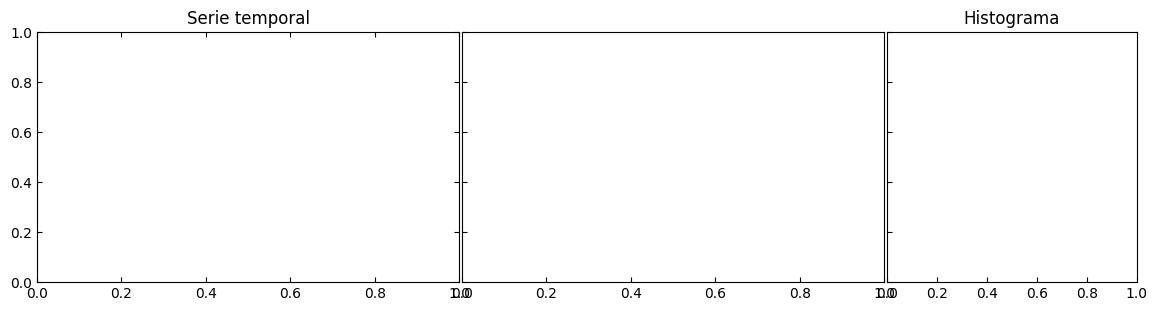

In [5]:
import matplotlib.pyplot as plt

df = air_quality_data['Monóxido de Carbono']
bins = 20

bottom, height = 0.1, 0.65
left, width = bottom, height*1.3
spacing = 0.005

rect_ser = [left-width-spacing, bottom, width, height]
rect_box = [left, bottom, width, height]
rect_hist = [left + width + spacing, bottom, height/1.3, height]

plt.figure(figsize=(5, 5/1.3))

ax_ser  = plt.axes(rect_ser)
ax_ser.tick_params(direction='in', top=True, right=True)
ax_ser.set_title('Serie temporal')

ax_box  = plt.axes(rect_box)
ax_box.tick_params(direction='in', labelleft=False)

ax_hist = plt.axes(rect_hist)
ax_hist.tick_params(direction='in', labelleft=False)
ax_hist.set_title('Histograma')

lim_max = df['measuring'].max()+df['measuring'].max()*10/100
lim_min = df['measuring'].min()-df['measuring'].min()*10/100

df['measuring'].plot(ax=ax_ser)
ax_ser.set_ylim(lim_min, lim_max)

ax_hist.hist(df['measuring'], bins=bins, orientation='horizontal')
ax_hist.set_ylim(lim_min, lim_max)

df = df.dropna(axis='index', how='all', subset=['Hour'])
df['Hour'] = df['Hour'].astype('int64')
df.pivot(columns='Hour')['measuring'].dropna(
        axis='columns', how='all').plot.box(
            ax=ax_box,title='Comportamento médio no período')
ax_box.set_ylim(ax_hist.get_ylim())